In [1]:
import toolbox as tb
import tensorflow as tf

from keras.applications import EfficientNetV2L
from keras.callbacks import EarlyStopping
from keras.layers import *
from keras.metrics import *

from tensorflow.image import flip_left_right, adjust_brightness, adjust_contrast

In [2]:
INPUT_SHAPE = (224, 224, 3)
NB_OF_LABELS = 4
METRICS = ["accuracy"]
EARLY_STOP = EarlyStopping(patience=3, monitor="val_loss")

In [3]:
model = tb.new_model(EfficientNetV2L, include_top=False, input_shape=INPUT_SHAPE)

In [4]:
tb.freeze(model)

In [5]:
new_layers = [
    GlobalAveragePooling2D(),
    # ------------------------- #
    Dense(512, activation="relu"),
    Dropout(0.2),
    # ------------------------- #
    Dense(512, activation="relu"),
    Dropout(0.2)
]
model = tb.new_cnn(model, nb_of_labels=NB_OF_LABELS, new_layers=new_layers)

# model.summary()

In [6]:
train_dataset, validation_dataset = tb.get_datasets(folders_path="data/images")

# print(train_dataset)
# print(validation_dataset)

Found 2400 files belonging to 4 classes.
Using 1920 files for training.
Found 2400 files belonging to 4 classes.
Using 480 files for validation.


In [7]:
def augment(image, label):
    image = flip_left_right(image) # rotation
    image = adjust_brightness(image, delta=0.1) # exposition
    image = adjust_contrast(image, contrast_factor=1.75)

    return (image, label)

train_dataset = train_dataset.map(augment, num_parallel_calls=tf.data.AUTOTUNE)

In [8]:
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(tf.data.AUTOTUNE)

In [9]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()

tb.compile_model(model, loss=loss_function, metrics=METRICS, learning_rate=0.001)

In [10]:
training_callbacks = [EARLY_STOP]
training = tb.train_model(
    model,
    train_data = train_dataset,
    validation_data = validation_dataset,
    nb_of_epochs = 1,
    callbacks = training_callbacks
)

480/480 [==============================] - 636s 1s/step - loss: 0.2392 - accuracy: 0.9193 - val_loss: 0.0820 - val_accuracy: 0.9688


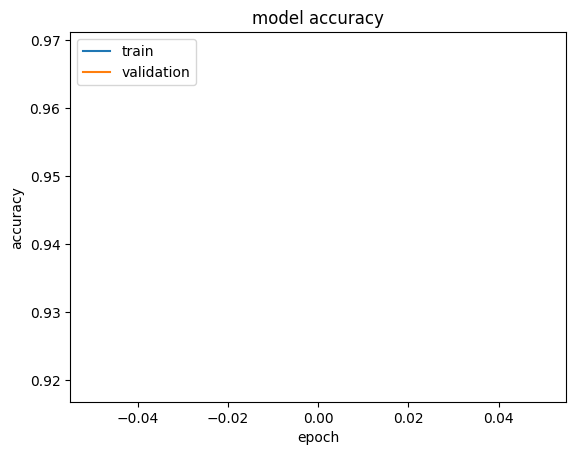

In [11]:
tb.graph("accuracy", training).show()

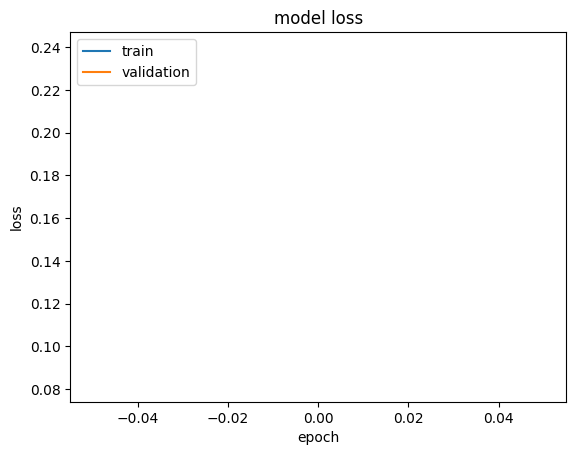

In [12]:
tb.graph("loss", training).show()